<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/Basics/FC_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Key Details 
```
      DataSet: CIFAR10 from inbuilt in Keras
      Deep learning Framework: Tensorflow with Keras
      Deep learning Method: Fully Connected only
      Optimizer:SGD with 0.01
      Results: 50 to 52% Accurate
```
#### Done by shriarul643@gmail.com

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(trainData,trainLabel),(testData,testLabel) = cifar10.load_data()
print(trainData.shape)

170500096/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)


In [3]:
TargetLabels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [4]:
le = LabelBinarizer()
trainLabel = le.fit_transform(trainLabel)
testLabel = le.fit_transform(testLabel)

In [5]:
trainData = trainData.reshape(trainData.shape[0],trainData.shape[1]*trainData.shape[2]*trainData.shape[3])
testData = testData.reshape(testData.shape[0],testData.shape[1]*testData.shape[2]*testData.shape[3])
trainData = trainData.astype('float32')/255.0
testData = testData.astype('float32')/255.0


In [6]:
trainData.shape

(50000, 3072)

In [7]:
model = Sequential([Dense(1024,activation='sigmoid',input_shape=(trainData.shape[1],)),
                    Dense(512,activation='sigmoid'),
                    Dense(10,activation='softmax')])

In [8]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=SGD(0.01))
H = model.fit(trainData,trainLabel,validation_data=(testData,testLabel),epochs=100,batch_size=32,verbose=0)

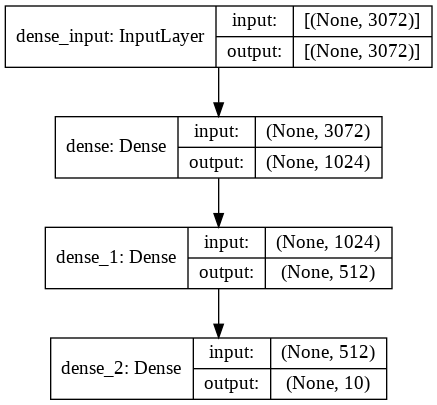

In [9]:
plot_model(model,show_shapes=True)

In [10]:
# H.history,H.epoch

In [11]:
plt.style.use('ggplot')

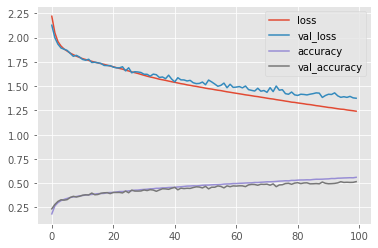

In [12]:
plt.figure()
plt.plot(np.arange(100),H.history['loss'],label='loss')
plt.plot(np.arange(max(H.epoch)+1),H.history['val_loss'],label='val_loss')
plt.plot(np.arange(100),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(max(H.epoch)+1),H.history['val_accuracy'],label='val_accuracy')

plt.legend()
plt.show()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


In [14]:
predicted = model.predict(testData,batch_size=128,verbose=1)

79/79 [==============================] - 0s 2ms/step


In [15]:
print(classification_report(testLabel.argmax(axis=1),predicted.argmax(axis=1),target_names=TargetLabels))

              precision    recall  f1-score   support

    airplane       0.51      0.68      0.58      1000
  automobile       0.64      0.64      0.64      1000
        bird       0.37      0.44      0.40      1000
         cat       0.40      0.33      0.36      1000
        deer       0.39      0.46      0.42      1000
         dog       0.46      0.38      0.41      1000
        frog       0.54      0.59      0.56      1000
       horse       0.70      0.46      0.55      1000
        ship       0.67      0.61      0.64      1000
       truck       0.57      0.56      0.57      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



In [16]:
_,acc = model.evaluate(testData,testLabel)
print('Accuracy is {:.2f}%'.format(acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.3754 - accuracy: 0.5155
Accuracy is 51.55%


In [17]:
predicted[5]

array([2.7908979e-02, 1.3872555e-03, 1.2551391e-01, 1.5128447e-01,
       5.0150290e-02, 7.5636096e-02, 5.5429423e-01, 9.9378861e-03,
       1.2088369e-04, 3.7659577e-03], dtype=float32)

In [18]:
print('Predicted Label : {} \nActual Label : {}'.format(TargetLabels[np.argmax(predicted[5])],TargetLabels[np.argmax(testLabel[5])]))

Predicted Label : frog 
Actual Label : frog


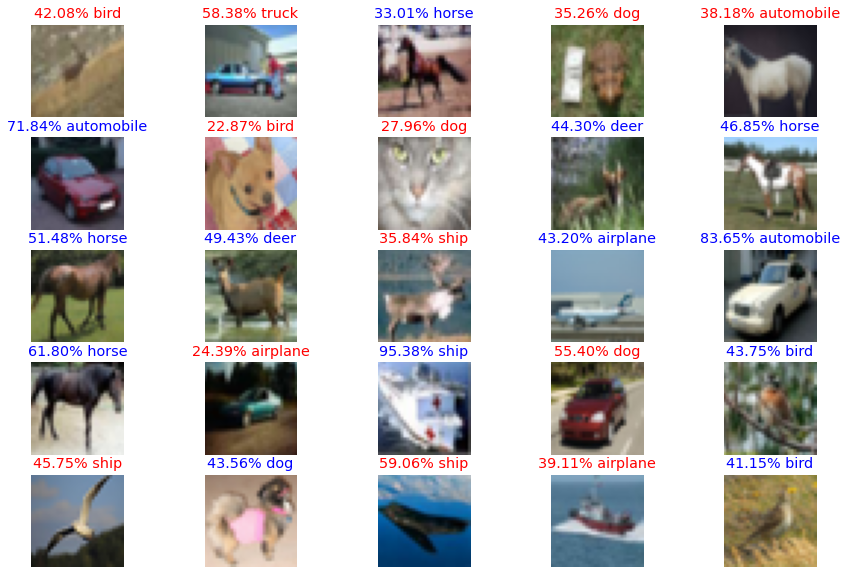

In [19]:
RandomImageIndex = np.random.randint(0,len(testData),(25,))
plt.figure(figsize=(15,10))
for i,j in enumerate(RandomImageIndex):
  plt.subplot(5,5,i+1)
  plt.imshow(testData[j].reshape(32,32,3),cmap=plt.cm.binary)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  predicted_label = TargetLabels[np.argmax(predicted[j])]
  true_label = TargetLabels[np.argmax(testLabel[j])]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.title("{:.2f}% {}".format(predicted[j].max()*100,predicted_label),color=color)
plt.show()